# Использование фреймворка Tensorflow.

Знакомство с фреймворком, создание простых полносвязный нейронных сетей.

Для практики лучше загрузить этот ноутбук в google colab.



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

В Tensorflow все объекты являются "тензорами" (не в классическим математическом смысле, а просто объемными матрицами) к которым применяются различные математические операции (сложение тензоров, умножение и т.п.). Поток (flow) этих операций и составляет процесс, который программируется с помощью tensorflow.

In [4]:
a = tf.Variable([1, -1, 2, -2])
print(a)
print(a.numpy())
print(tf.abs(a))

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([ 1, -1,  2, -2], dtype=int32)>
[ 1 -1  2 -2]
tf.Tensor([1 1 2 2], shape=(4,), dtype=int32)


# Пример 1: классификация

In [7]:
from sklearn.datasets import make_classification

In [8]:
data = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_classes=2)

In [11]:
points = data[0]
targets = data[1]

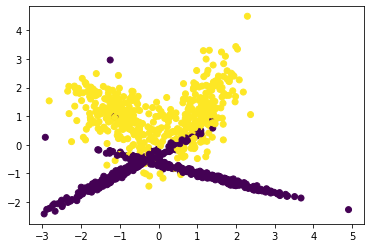

In [13]:
plt.scatter(points[:,0], points[:,1], c=targets)
plt.show()

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Создадим простуй нейросеть с одним скрытым слоем из 50 нейронов и выходным слоем из одного нейрона, который будет давать вероятность отнесения к классу "1".

In [17]:
model = Sequential()
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='MSE', metrics=['accuracy'])

In [18]:
model.fit(points, targets, epochs=10, verbose=1)

Epoch 1/10
32/32 [==============================] - 1s 1ms/step - loss: 0.2587 - accuracy: 0.5210
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 0.2261 - accuracy: 0.7440
Epoch 3/10
32/32 [==============================] - 0s 955us/step - loss: 0.2049 - accuracy: 0.9010
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1864 - accuracy: 0.9200
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1691 - accuracy: 0.9250
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1531 - accuracy: 0.9240
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1384 - accuracy: 0.9250
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1248 - accuracy: 0.9280
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1125 - accuracy: 0.9280
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1022 - accuracy: 0.9260


In [19]:
from sklearn.metrics import classification_report

Модель возвращает нам вероятности, а нам нужны метки 0 или 1. Запишем в класс 1 все элементы с вероятностью большей 0.75.

In [20]:
result = [1 if x > 0.75 else 0 for x in model.predict(points)]

In [21]:
print(classification_report(targets, result))

              precision    recall  f1-score   support

           0       0.65      1.00      0.78       501
           1       1.00      0.45      0.62       499

    accuracy                           0.73      1000
   macro avg       0.82      0.72      0.70      1000
weighted avg       0.82      0.72      0.70      1000



Видим, что результаты не очень высокие. Можно постараться их улучшить, усложнив архитектуру сети (например, добавив дополнительный слой нейронов). Попробуйте сделать это самостоятельно.

In [23]:
model.predict(points[0:1])

array([[0.45834383]], dtype=float32)

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                150       
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


# Пример 2: распознавание рукописных цифр

In [25]:
from sklearn.datasets import load_digits

In [26]:
data = load_digits()

In [27]:
model1 = Sequential()
model1.add(Dense(100, activation='sigmoid', input_shape=(64,)))
model1.add(Dense(100, activation='sigmoid'))
model1.add(Dense(10, activation='softmax'))

In [28]:
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
data.target

array([0, 1, 2, ..., 8, 9, 8])

In [30]:
y = tf.keras.utils.to_categorical(data.target)

In [31]:
y[50], data.target[50]

(array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 2)

In [32]:
history = model1.fit(data.data, y, validation_split=0.1, epochs=10)

Epoch 1/10
51/51 [==============================] - 1s 5ms/step - loss: 1.9243 - accuracy: 0.5646 - val_loss: 1.5742 - val_accuracy: 0.7667
Epoch 2/10
51/51 [==============================] - 0s 2ms/step - loss: 1.2316 - accuracy: 0.8639 - val_loss: 1.0249 - val_accuracy: 0.8278
Epoch 3/10
51/51 [==============================] - 0s 2ms/step - loss: 0.7472 - accuracy: 0.9153 - val_loss: 0.6669 - val_accuracy: 0.8944
Epoch 4/10
51/51 [==============================] - 0s 2ms/step - loss: 0.4611 - accuracy: 0.9425 - val_loss: 0.5128 - val_accuracy: 0.8667
Epoch 5/10
51/51 [==============================] - 0s 2ms/step - loss: 0.3000 - accuracy: 0.9573 - val_loss: 0.3946 - val_accuracy: 0.9056
Epoch 6/10
51/51 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.9672 - val_loss: 0.3052 - val_accuracy: 0.9222
Epoch 7/10
51/51 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9728 - val_loss: 0.2823 - val_accuracy: 0.9333
Epoch 8/10
51/51 [==

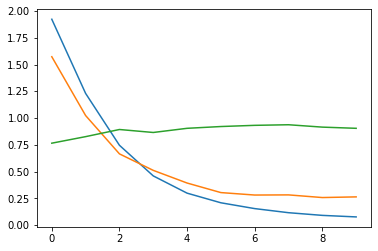

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.show()